![](https://drive.google.com/uc?export=view&id=1xqQczl0FG-qtNA2_WQYuWePW9oU8irqJ)

# 2.05 Exploratory Data Analysis (EDA)
We have seen some early examples of EDA in the previous notebooks. This session will expand on this with more examples - specifically a dataset on student performance. You can find the data on my.wbs as "students.csv" (in week 3, asynchronous tasks). As such, we start by importing the data:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import files
upload = files.upload()

Saving students_two.csv to students_two.csv


We can now import the data into pandas as before:

In [5]:
students = pd.read_csv('students_two.csv')
students.head()

,Id,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


We can find the number of rows and columns with ".shape":

In [10]:
students.shape

(145, 14)

1000 rows and 7 columns. We can get informtaion about the data using the _info_ function:

In [7]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  145 non-null    int64 
 1   Student_Age         145 non-null    int64 
 2   High_School_Type    145 non-null    object
 3   Scholarship         144 non-null    object
 4   Additional_Work     145 non-null    object
 5   Sports_activity     145 non-null    object
 6   Transportation      145 non-null    object
 7   Weekly_Study_Hours  145 non-null    int64 
 8   Attendance          145 non-null    object
 9   Reading             145 non-null    object
 10  Notes               145 non-null    object
 11  Listening_in_Class  145 non-null    object
 12  Project_work        145 non-null    object
 13  Grade               145 non-null    object
dtypes: int64(3), object(11)
memory usage: 16.0+ KB


We can see from this our data items are of the type 'object' (meaning string) or int64 (64-bit integers). We can also see that each has "1000 non-null" records and there are "1000 entries". Seemingly there is no missing data but we can of course verify that with code we used in our previous pandas' Notebooks:

In [8]:
students.isnull().sum()

,0
Id,0
Student_Age,0
High_School_Type,0
Scholarship,1
Additional_Work,0
Sports_activity,0
Transportation,0
Weekly_Study_Hours,0
Attendance,0
Reading,0


No missing data! If we had found some there are various options including deleting the rows (see the previous Notebook) effected or even deleting the columns. If we want to check if its sensible to delete a column we may want to see the percentage of the column's data that is missing:

In [11]:
# Percent of data which is not available
students.isnull().sum()/len(students) * 100

,0
Id,0.000000
Student_Age,0.000000
High_School_Type,0.000000
Scholarship,0.689655
Additional_Work,0.000000
Sports_activity,0.000000
Transportation,0.000000
Weekly_Study_Hours,0.000000
Attendance,0.000000
Reading,0.000000


We can find the number of unique and duplicated rows:

In [12]:
students.duplicated().value_counts()

,count
False,145


No duplicates (i.e. there are 1000 records for which its False that the record is a duplicate). Pandas will also give us summary statistics about this data:

In [13]:
students.describe()

,Id,Student_Age,Weekly_Study_Hours
count,145.000000,145.000000,145.000000
mean,5073.000000,19.682759,2.331034
std,42.001984,1.992010,4.249273
min,5001.000000,18.000000,0.000000
25%,5037.000000,18.000000,0.000000
50%,5073.000000,19.000000,0.000000
75%,5109.000000,21.000000,2.000000
max,5145.000000,26.000000,12.000000


We can see that only three of the columns have been "described" ... the three that were numeric (int64). For each, we get a range of useful measures including the mean average, the standard deviation, minimum and maximum values, and the 25th, 50th (median) and 75th percentyles.

### Visualising the Data

[]

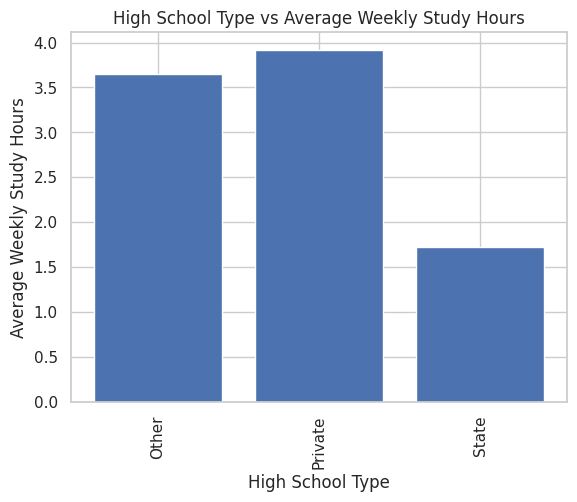

In [17]:
grouped_data = students.groupby('High_School_Type')['Weekly_Study_Hours'].mean()
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('High School Type') # x-axis is High School Type
plt.xticks(rotation=90) # rotate x labels 90 degrees (vertical)
plt.ylabel('Average Weekly Study Hours') # y-axis is Average Weekly Study Hours
plt.title('High School Type vs Average Weekly Study Hours') # add title
plt.plot() # plot the chart to screen

Interstingly if you parents had masters-level education your math score is lower! Let's try another:

[]

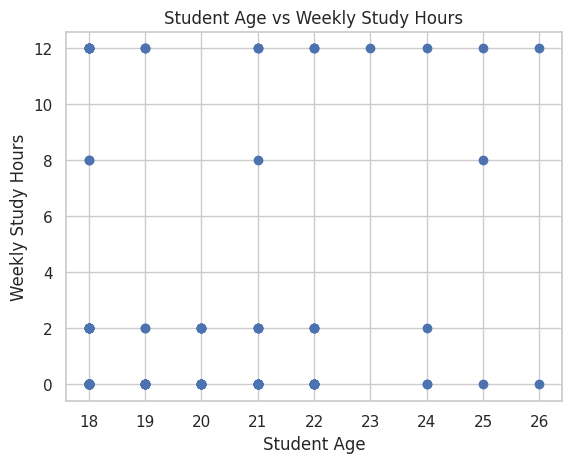

In [19]:
plt.scatter(students['Student_Age'], students['Weekly_Study_Hours'])
plt.xlabel('Student Age')
plt.ylabel('Weekly Study Hours')
plt.title('Student Age vs Weekly Study Hours')
plt.plot()

Again, perhaps unsurprisingly, there seems to be good correlation between maths performance and reading performance (they trend together).

We may also want to see how "normal" our data is - i.e. does it follow a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). Let's check with a histogram:

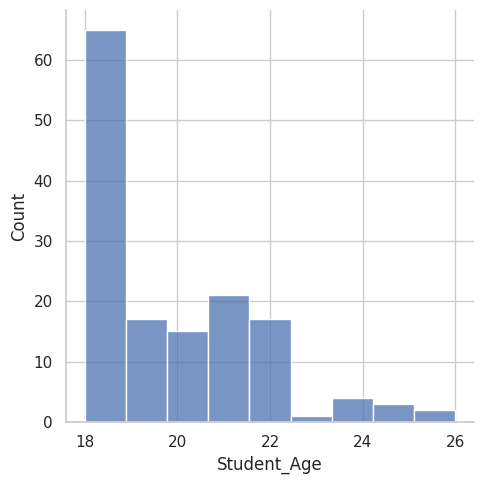

In [21]:
ax = sns.displot(students['Student_Age'])

Whilst this is not exactly normal - slightly skewed - its probably fine in practice.

We can use the _pairplot( )_ method to visualise pairs of variables:

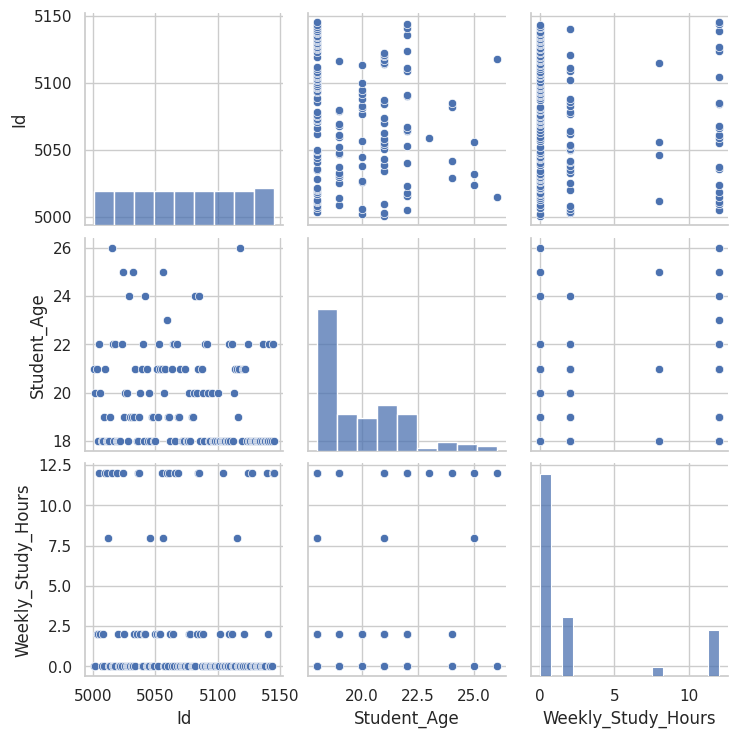

In [23]:
sns.pairplot(data = students[['Id', 'Student_Age', 'Weekly_Study_Hours']], diag_kind='hist')

Here we have the scatter plot when comparing two variables, and when its only a single variable we have a histogram.

We may also decide to remove a variable:

In [25]:
students = students.drop(['Id'], axis=1)
students.head()

,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Obviously don't drop lunch in the real-world ... you will get hungry.

And that's it! There are of course many of things we could do but this is a fairly typical example of an EDA process. Well done :)

